In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [3]:
# Ask user to input the file path, for example C:\Users\Jose Guevara\Desktop\Kaggle\2024 Boston Marathon Weather and Splits\Datasets\Athletes.csv
file_path = input("Please enter the path to the CSV file: ")
df = pd.read_csv(file_path)

In [4]:
# Set the Bib column as the index
df.set_index('Bib', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17220 entries, 25 to 7786
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zip             17220 non-null  int64  
 1   Age             17220 non-null  int64  
 2   Age Group       17220 non-null  object 
 3   Gender          17220 non-null  object 
 4   First Half      17220 non-null  float64
 5   Second Half     17220 non-null  float64
 6   Finish          17220 non-null  float64
 7   Positive Split  17220 non-null  float64
 8   Percent Change  17220 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 1.3+ MB


In [6]:
# Replace infinite values with NaN and drop rows with NaN values
df.dropna(inplace=True)

# Convert Gender to categorical values (M -> 0, F -> 1)
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

In [7]:
# Convert Age Group to numerical categories
age_group_mapping = {
    "Under 35": 0, "35-39": 1, "40-44": 2, "45-49": 3,
    "50-54": 4, "55-59": 5, "60-64": 6, "65-69": 7,
    "70-74": 8, "75-79": 9, "80 and Over": 10
}
df['Age Group'] = df['Age Group'].map(age_group_mapping)

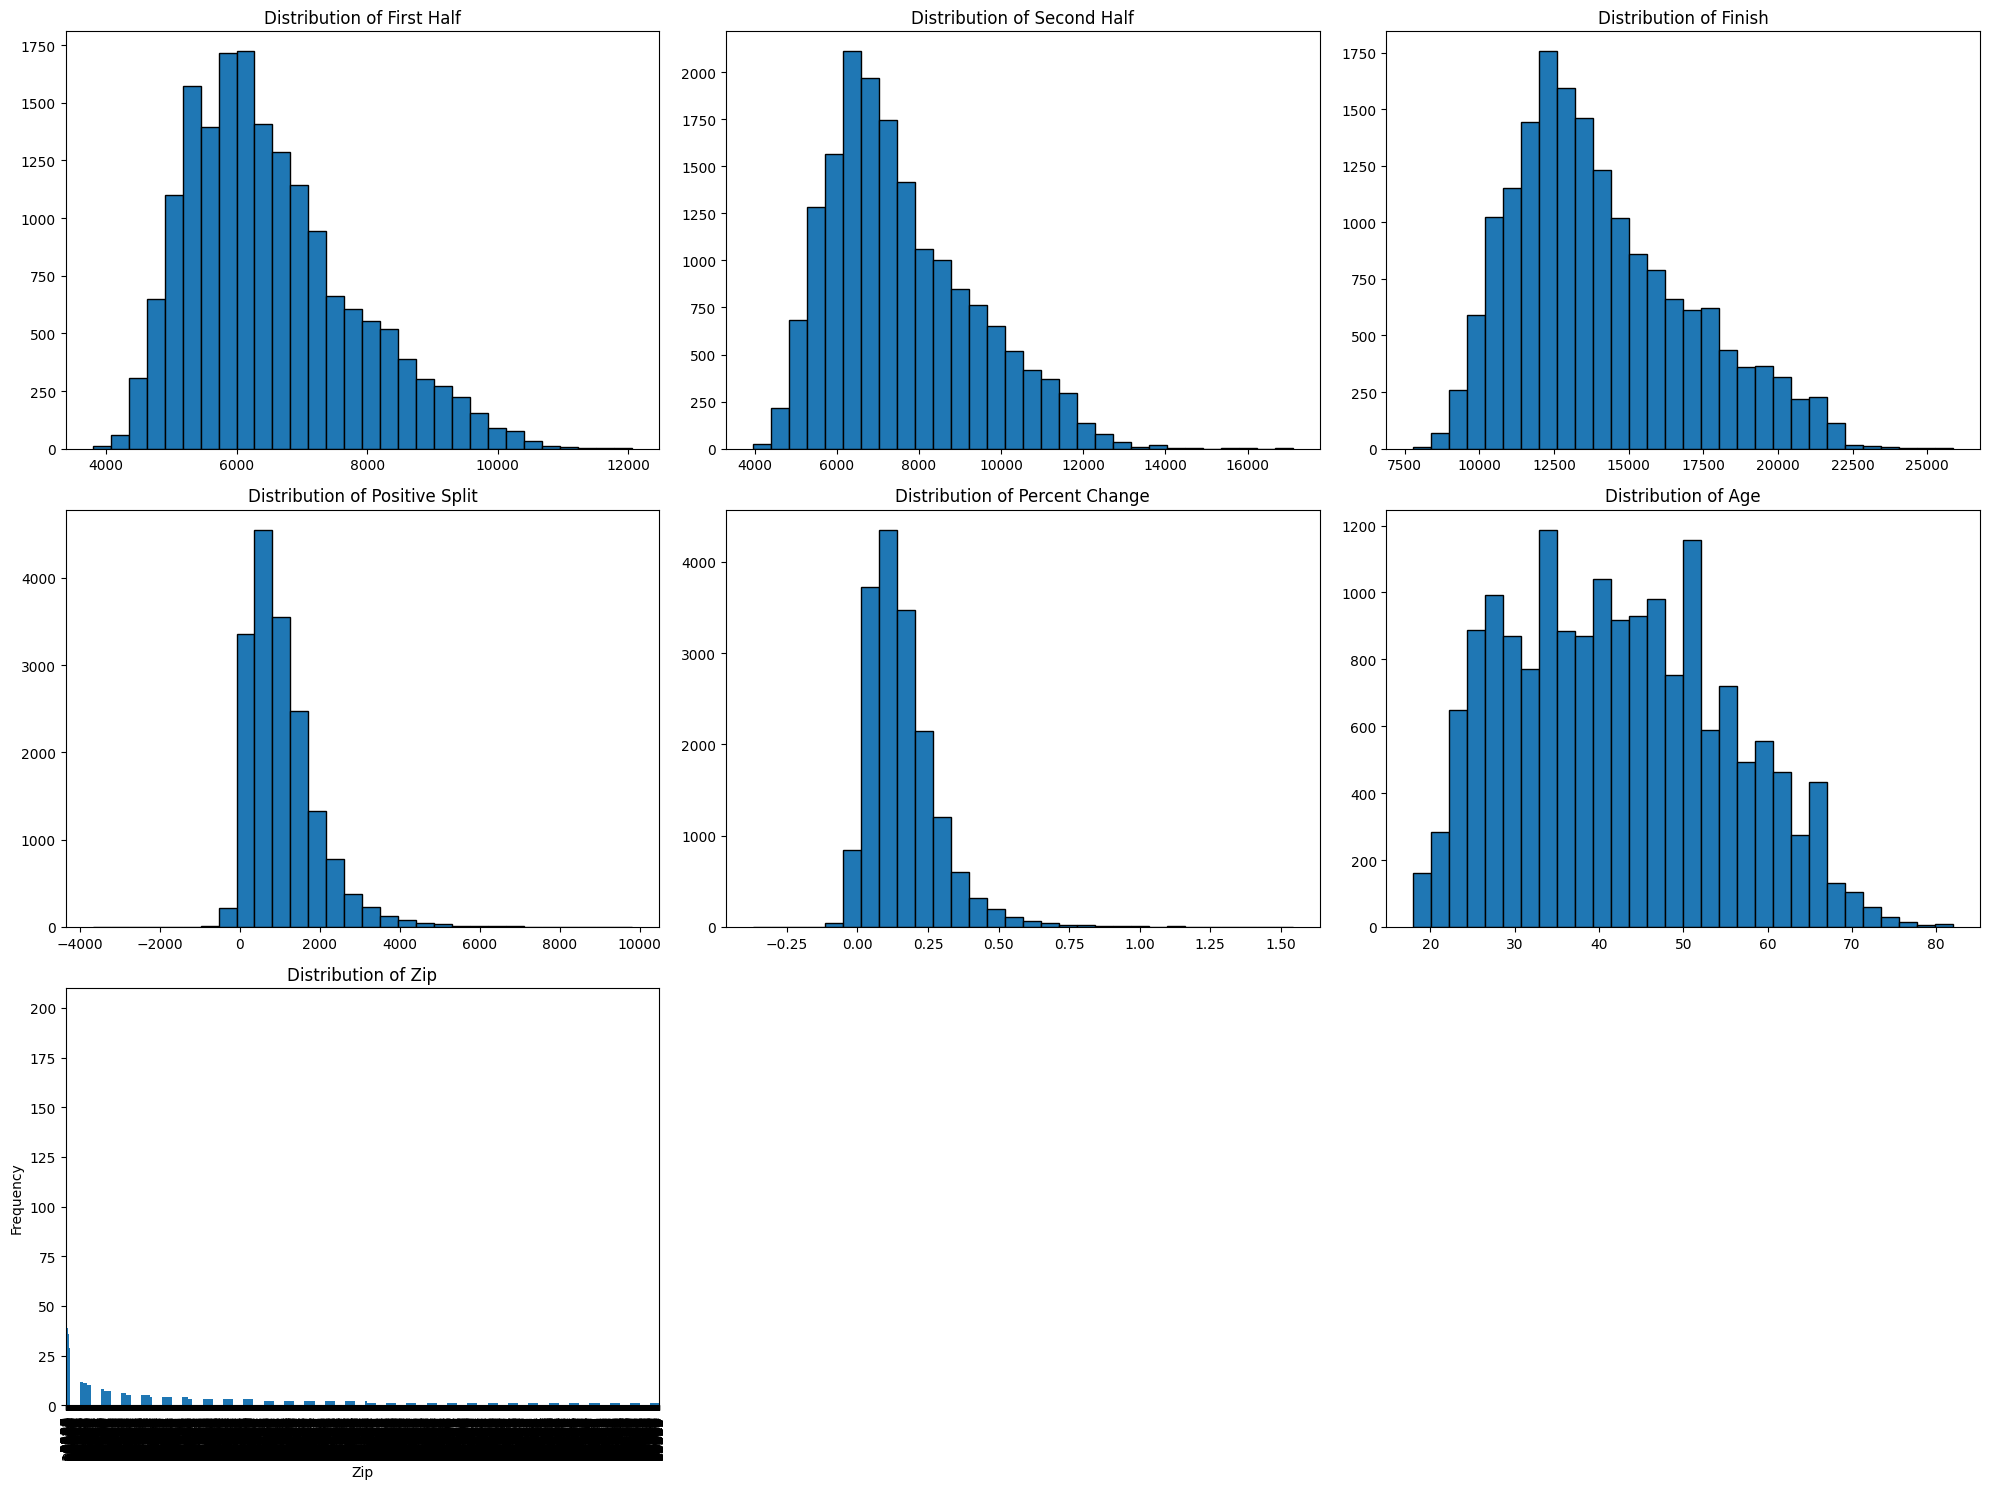

In [8]:
# Distribution plots for the variables
plt.figure(figsize=(20, 15))

# Plot only if data is not empty
if not df.empty:
    # First Half
    plt.subplot(3, 3, 1)
    plt.hist(df['First Half'], bins=30, edgecolor='black')
    plt.title('Distribution of First Half')

    # Second Half
    plt.subplot(3, 3, 2)
    plt.hist(df['Second Half'], bins=30, edgecolor='black')
    plt.title('Distribution of Second Half')

    # Finish
    plt.subplot(3, 3, 3)
    plt.hist(df['Finish'], bins=30, edgecolor='black')
    plt.title('Distribution of Finish')

    # Positive Split
    plt.subplot(3, 3, 4)
    plt.hist(df['Positive Split'], bins=30, edgecolor='black')
    plt.title('Distribution of Positive Split')

    # Percent Change
    plt.subplot(3, 3, 5)
    plt.hist(df['Percent Change'], bins=30, edgecolor='black')
    plt.title('Distribution of Percent Change')

    # Age
    plt.subplot(3, 3, 6)
    plt.hist(df['Age'], bins=30, edgecolor='black')
    plt.title('Distribution of Age')

    # Zip (using a bar plot)
    plt.subplot(3, 3, 7)
    df['Zip'].value_counts().plot(kind='bar')
    plt.title('Distribution of Zip')
    plt.xlabel('Zip')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

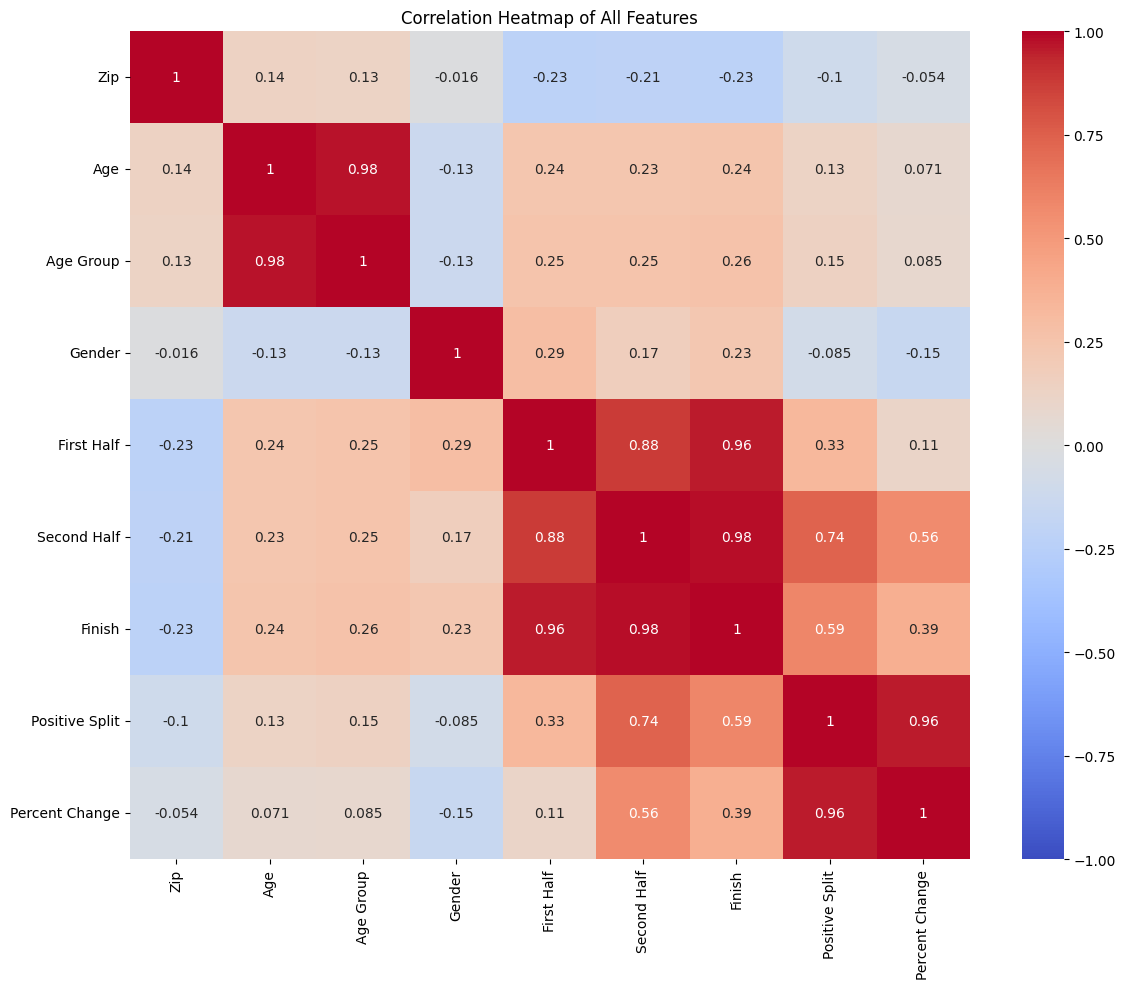

In [9]:
# Correlation heatmap for all features
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

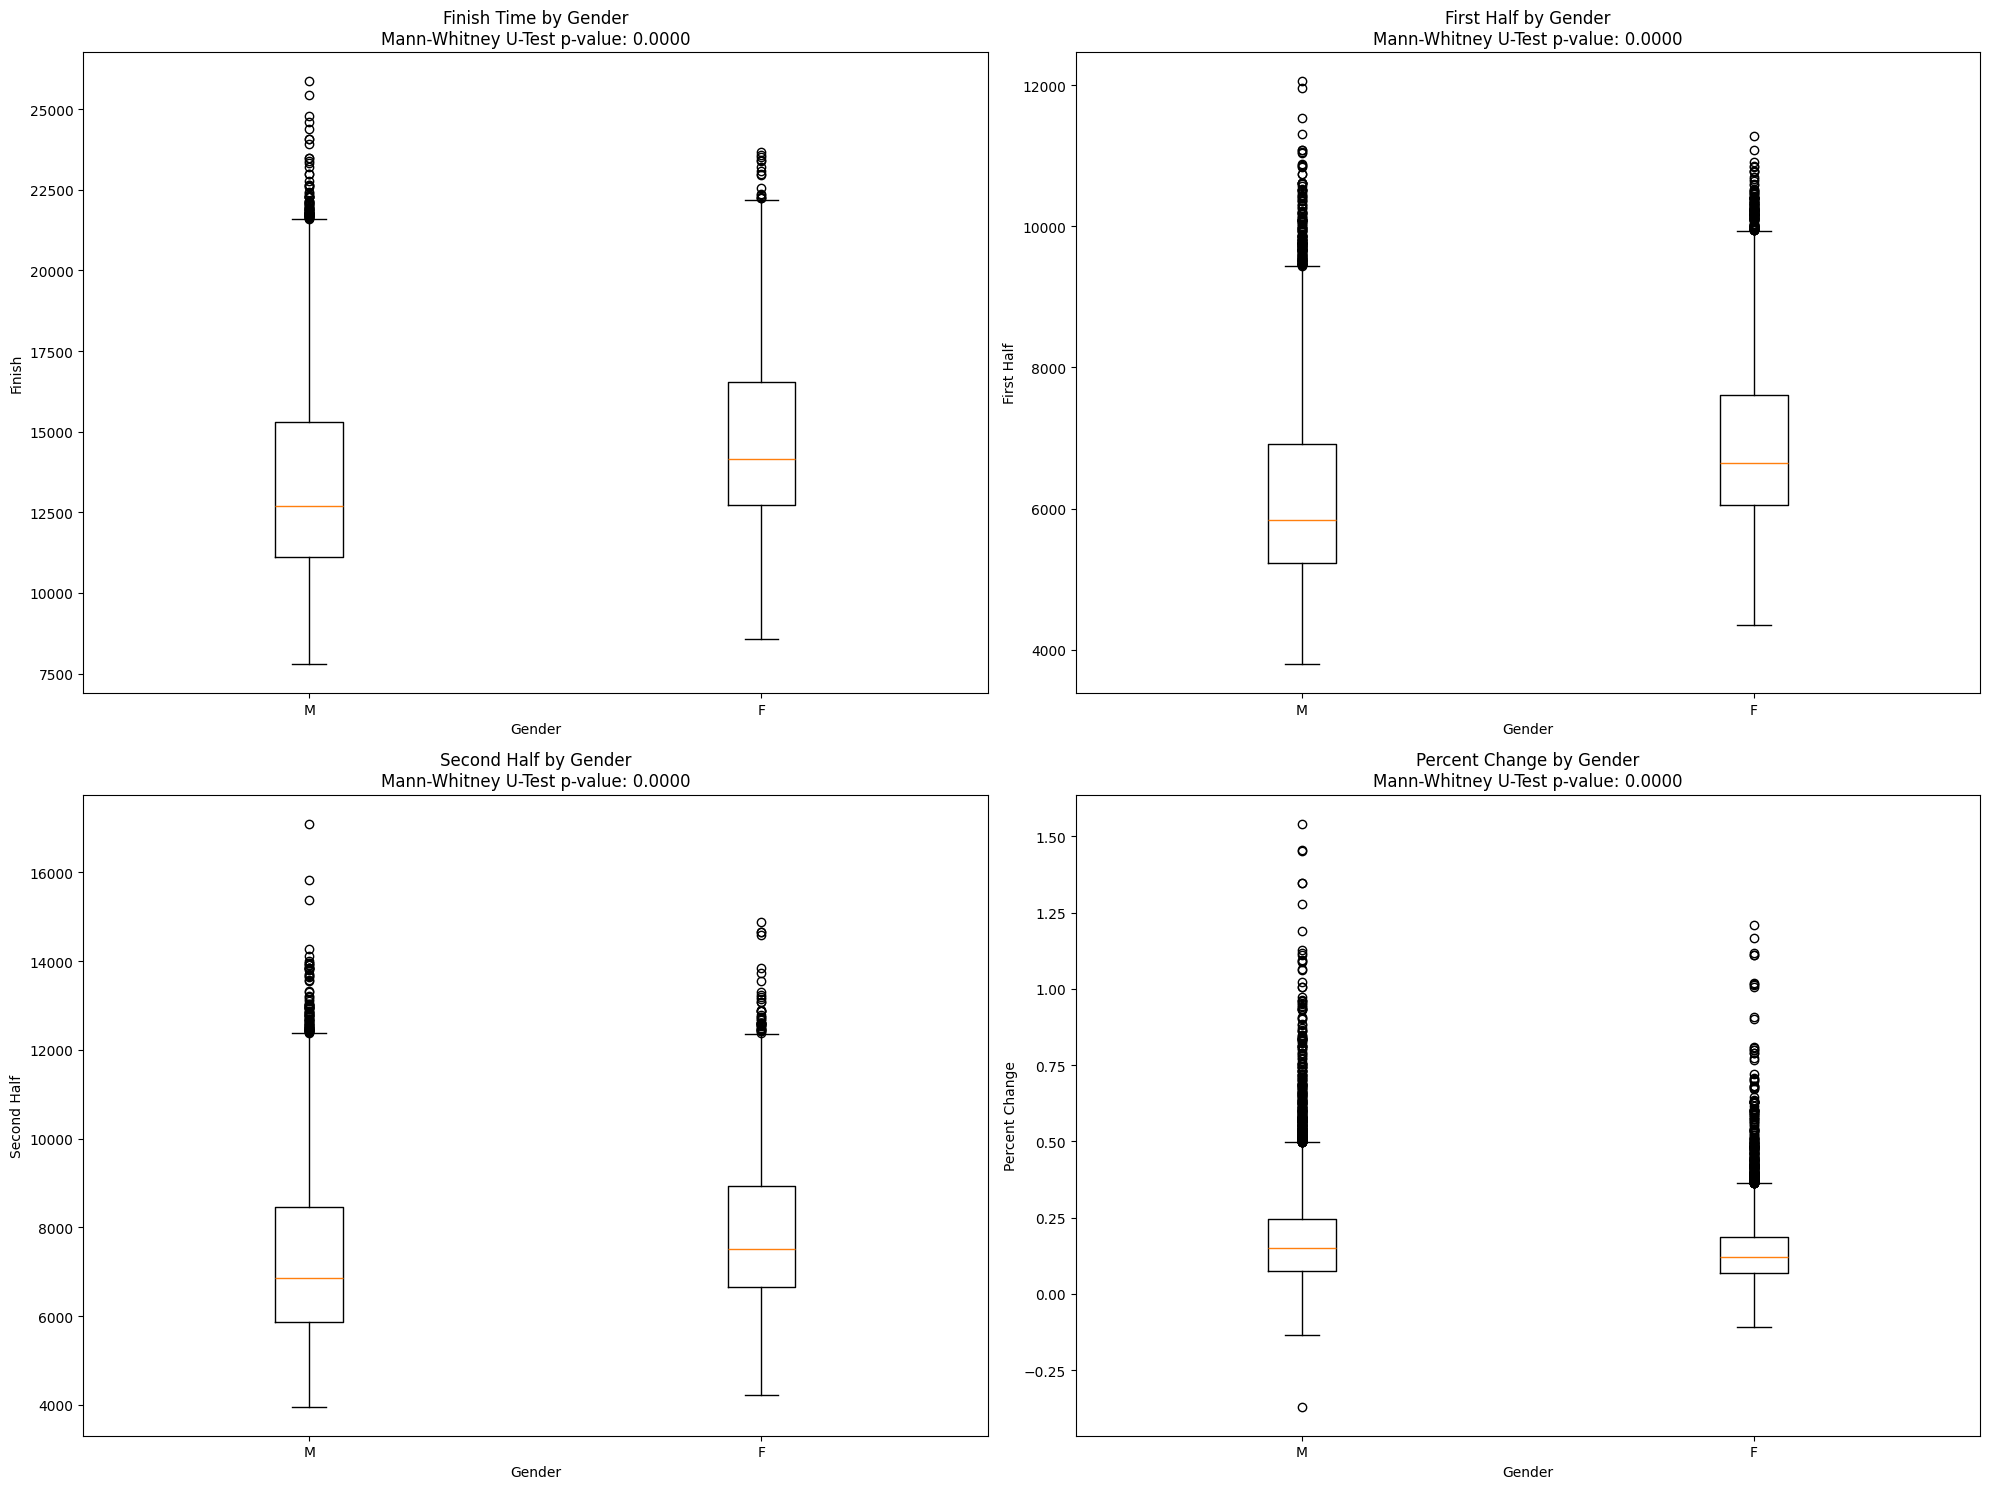

In [10]:
# Boxplots with Mann-Whitney U-Test
def mann_whitney_u_test_plot(var, ax, title):
    male = df[df['Gender'] == 0][var]
    female = df[df['Gender'] == 1][var]
    u_stat, p_val = stats.mannwhitneyu(male, female)
    ax.boxplot([male, female], labels=['M', 'F'])
    ax.set_title(f'{title}\nMann-Whitney U-Test p-value: {p_val:.4f}')
    ax.set_xlabel('Gender')
    ax.set_ylabel(var)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Finish
mann_whitney_u_test_plot('Finish', axes[0, 0], 'Finish Time by Gender')

# First Half Split
mann_whitney_u_test_plot('First Half', axes[0, 1], 'First Half by Gender')

# Second Half Split
mann_whitney_u_test_plot('Second Half', axes[1, 0], 'Second Half by Gender')

# Percent Change
mann_whitney_u_test_plot('Percent Change', axes[1, 1], 'Percent Change by Gender')

plt.tight_layout()
plt.show()

# Age group comparison
age_group_comparison = df.groupby('Age Group')[['Finish', 'Positive Split', 'Percent Change']].mean().reset_index()

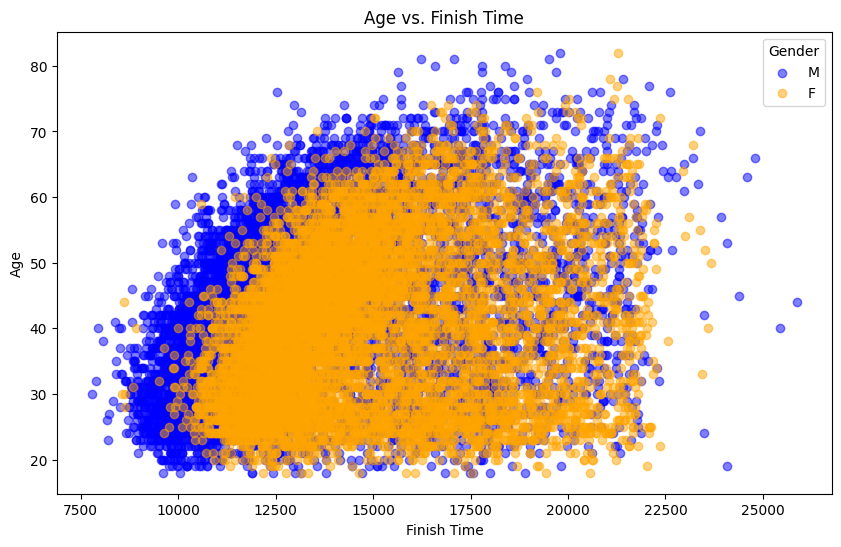

In [11]:
# Age vs. Finish Time with correlation, colored by gender
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'orange'}
for gender in df['Gender'].unique():
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Finish'], subset['Age'], alpha=0.5, label=f'Gender {gender}', color=colors[gender])

plt.title('Age vs. Finish Time')
plt.xlabel('Finish Time')
plt.ylabel('Age')
plt.legend(title='Gender', labels=['M', 'F'])

In [12]:
# Age group comparison
age_group_comparison = df.groupby('Age Group')[['Finish', 'Positive Split', 'Percent Change']].mean().reset_index()

# Correct order of age groups
correct_order = list(range(11))  # Numerical order from 0 to 10

# Sorting the age group comparison data with the correct order
sorted_age_group_comparison_correct = age_group_comparison.set_index('Age Group').loc[correct_order].reset_index()

In [13]:
# Display sorted age group comparison
print(sorted_age_group_comparison_correct.round(2))

    Age Group    Finish  Positive Split  Percent Change
0           0  13603.46          990.40            0.16
1           1  13422.06          944.70            0.15
2           2  13666.64          972.65            0.15
3           3  14015.98         1025.54            0.16
4           4  14496.07         1076.44            0.16
5           5  14926.14         1214.78            0.17
6           6  15624.31         1348.00            0.19
7           7  16340.48         1467.83            0.20
8           8  17431.05         1676.92            0.21
9           9  18660.64         1823.41            0.22
10         10  18332.88         1393.88            0.16


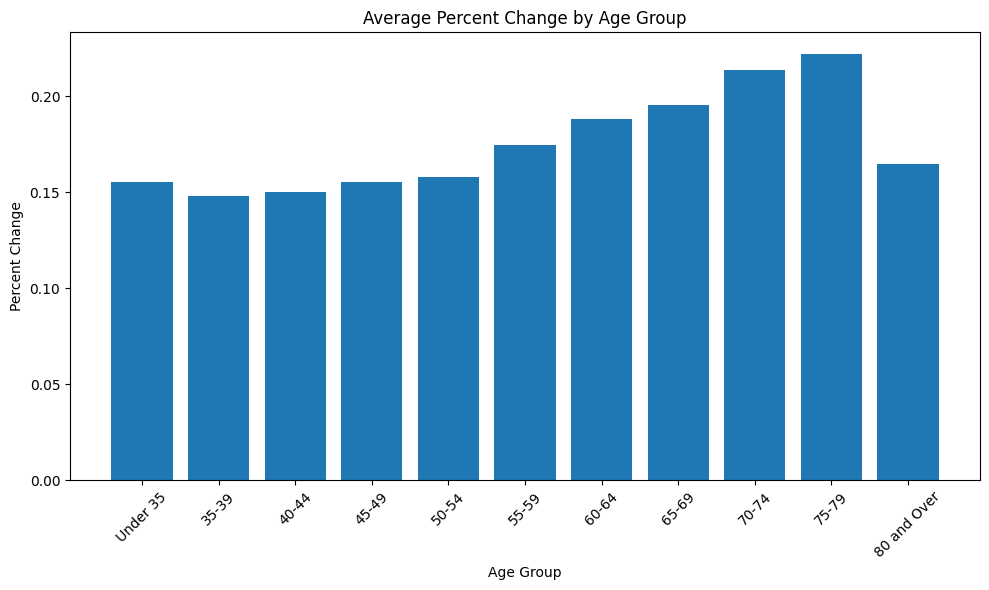

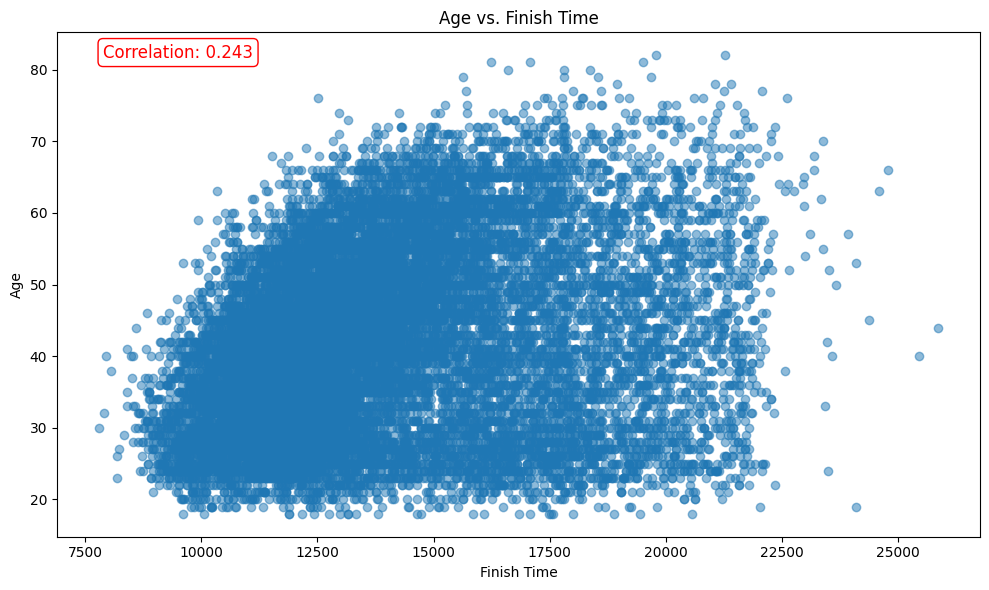

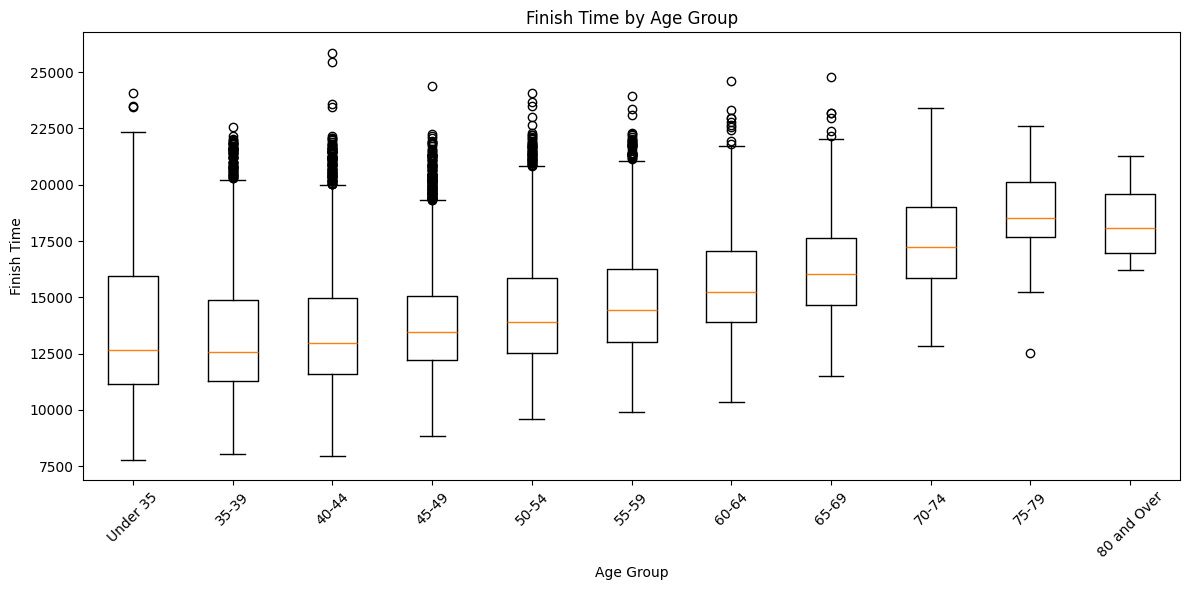

In [14]:
# Plotting the average percent change by age group
plt.figure(figsize=(10, 6))
plt.bar(sorted_age_group_comparison_correct['Age Group'], sorted_age_group_comparison_correct['Percent Change'])
plt.title('Average Percent Change by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percent Change')
plt.xticks(ticks=correct_order, labels=age_group_mapping.keys(), rotation=45)
plt.tight_layout()
plt.show()

# Age vs. Finish Time with correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Finish'], df['Age'], alpha=0.5)
plt.title('Age vs. Finish Time')
plt.xlabel('Finish Time')
plt.ylabel('Age')

# Calculate correlation
correlation = df[['Finish', 'Age']].corr().iloc[0, 1]
plt.annotate(f'Correlation: {correlation:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red', bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.tight_layout()
plt.show()

# Age Group vs. Finish Time (Boxplot)
plt.figure(figsize=(12, 6))
data_to_plot = [df[df['Age Group'] == i]['Finish'] for i in correct_order]
plt.boxplot(data_to_plot, labels=age_group_mapping.keys())
plt.title('Finish Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Finish Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()